# 0.Load Modules & Read Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import seaborn as sns
import math
from sklearn.feature_selection import f_classif, SelectKBest

%matplotlib inline

df = pd.read_csv("Coursework_1_data.csv")

# 1.Data exploration

## 1.1Have a quick look at the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


No missing value.
Some numeric data represent catogories, so change their types to 'category'.

In [6]:
change_types = ["Month","OperatingSystems", "Browser", "Region", "TrafficType","VisitorType"]
df[change_types] = df[change_types].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  int64   
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  int64   
 3   Informational_Duration   12330 non-null  float64 
 4   ProductRelated           12330 non-null  int64   
 5   ProductRelated_Duration  12330 non-null  float64 
 6   BounceRates              12330 non-null  float64 
 7   ExitRates                12330 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  float64 
 10  Month                    12330 non-null  category
 11  OperatingSystems         12330 non-null  category
 12  Browser                  12330 non-null  category
 13  Region                   12330 non-null  category
 14  Traffi

See the target 'Revenue' and another feature 'Month'.

In [7]:
df["Revenue"].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [8]:
df["Month"].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

An imbalanced dataset.

In [9]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


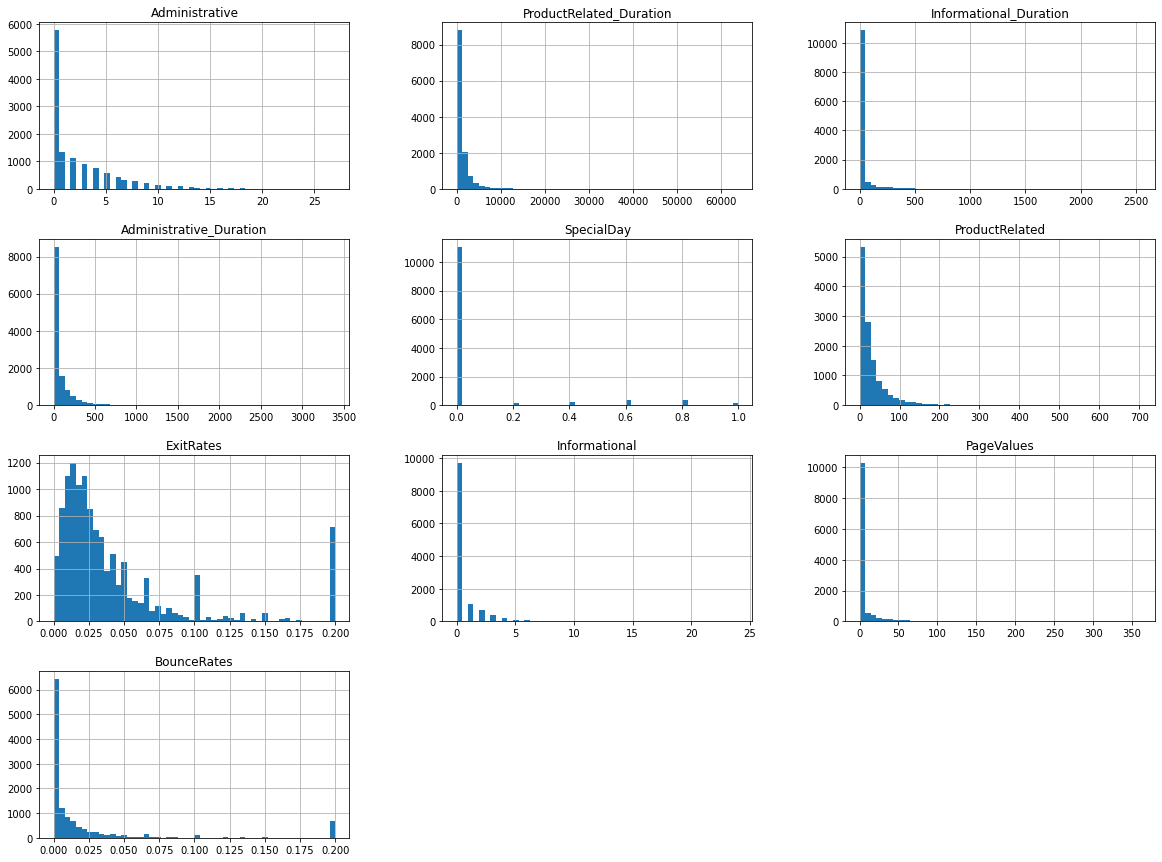

,Administrative,ProductRelated_Duration,Informational_Duration,Administrative_Duration,SpecialDay,ProductRelated,ExitRates,Informational,PageValues,BounceRates
Administrative,1.000000,0.373939,0.255848,0.601583,-0.094778,0.431119,-0.316483,0.376850,0.098990,-0.223563
ProductRelated_Duration,0.373939,1.000000,0.347364,0.355422,-0.036380,0.860927,-0.251984,0.387505,0.052823,-0.184541
Informational_Duration,0.255848,0.347364,1.000000,0.238031,-0.030577,0.280046,-0.105276,0.618955,0.030861,-0.074067
Administrative_Duration,0.601583,0.355422,0.238031,1.000000,-0.073304,0.289087,-0.205798,0.302710,0.067608,-0.144170
SpecialDay,-0.094778,-0.036380,-0.030577,-0.073304,1.000000,-0.023958,0.102242,-0.048219,-0.063541,0.072702
ProductRelated,0.431119,0.860927,0.280046,0.289087,-0.023958,1.000000,-0.292526,0.374164,0.056282,-0.204578
ExitRates,-0.316483,-0.251984,-0.105276,-0.205798,0.102242,-0.292526,1.000000,-0.163666,-0.174498,0.913004
Informational,0.376850,0.387505,0.618955,0.302710,-0.048219,0.374164,-0.163666,1.000000,0.048632,-0.116114
PageValues,0.098990,0.052823,0.030861,0.067608,-0.063541,0.056282,-0.174498,0.048632,1.000000,-0.119386
BounceRates,-0.223563,-0.184541,-0.074067,-0.144170,0.072702,-0.204578,0.913004,-0.116114,-0.119386,1.000000


In [10]:
cat_features = ["Month","OperatingSystems", "Browser", "Region", "TrafficType","VisitorType", "Weekend"]
bool_features = ["Revenue"]
num_features = list(set(df.columns) - set(cat_features) - set(bool_features))
df[num_features].hist(bins = 50, figsize=(20,15))
plt.show()
df[num_features].corr()

All the numeric data are skewed, and the max values are extremely large, seems like there are outliers?

Except the "Revenue" feature as target, others can be sorted as 5 groups:

1.Administrative, Informational, ProductRelated

2.Administrative_Duration, Informational_Duration, ProductRelated_Duration

3.BounceRates, ExitRates, PageValues

4.SpecialDay

5.OperatingSystems, Browser, TrafficType, VisitorType, Region, Weekend, Month

Let's see whether the two Revenue data has different pattern.

## 1.2Numeric features

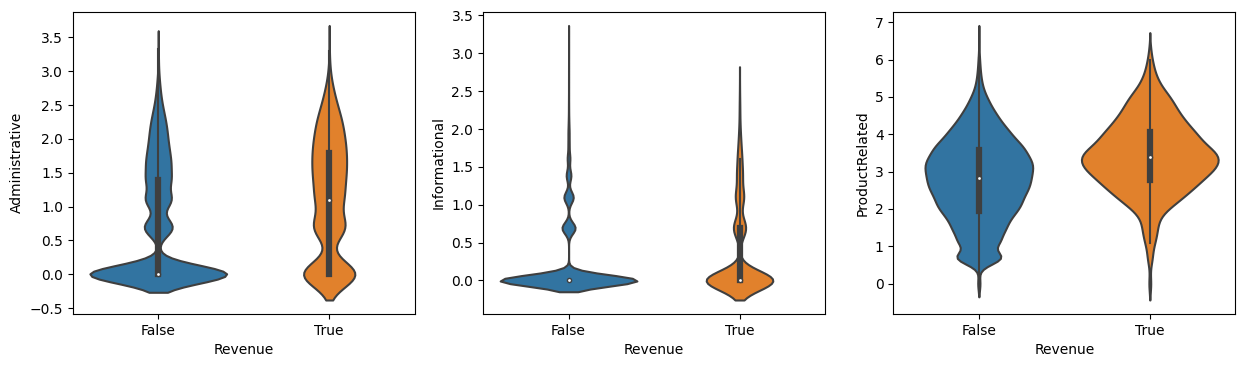

In [11]:
plt.figure(figsize=(15, 4), dpi=100)

plt.subplot(1,3,1)
sns.violinplot(y=df["Administrative"].apply(lambda x: math.log(x+1)), x=df["Revenue"])
#Use log() to narrow scope.
plt.subplot(1,3,2)
sns.violinplot(y=df["Informational"].apply(lambda x: math.log(x+1)), x=df["Revenue"])
plt.subplot(1,3,3)
sns.violinplot(y=df["ProductRelated"].apply(lambda x: math.log(x+1)), x=df["Revenue"])

plt.show()

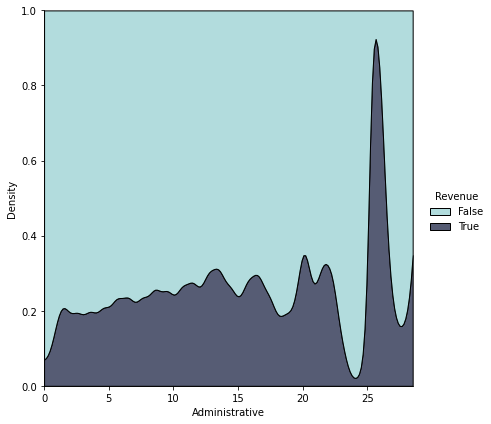

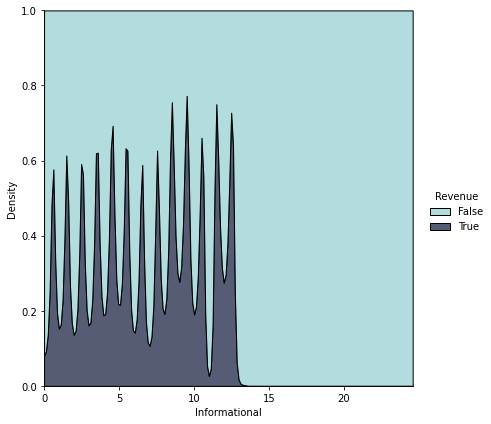

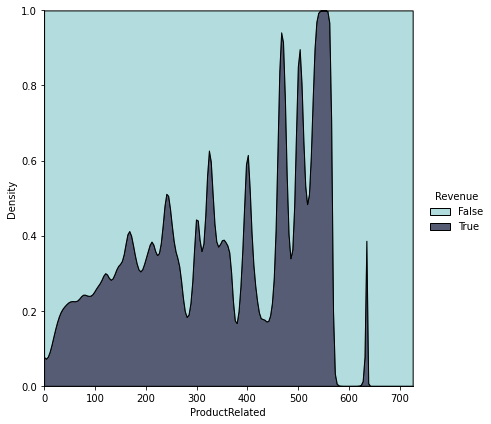

In [12]:
def kde_plot(data, column, hue):
 sns.displot(
     data=data,
     x=column, hue=hue,
     kind="kde", height=6,
     multiple="fill", clip=(0, None),
     palette="ch:rot=-.25,hue=1,light=.75",
 )
kde_plot(df, "Administrative", "Revenue")
kde_plot(df, "Informational", "Revenue")
kde_plot(df, "ProductRelated", "Revenue")

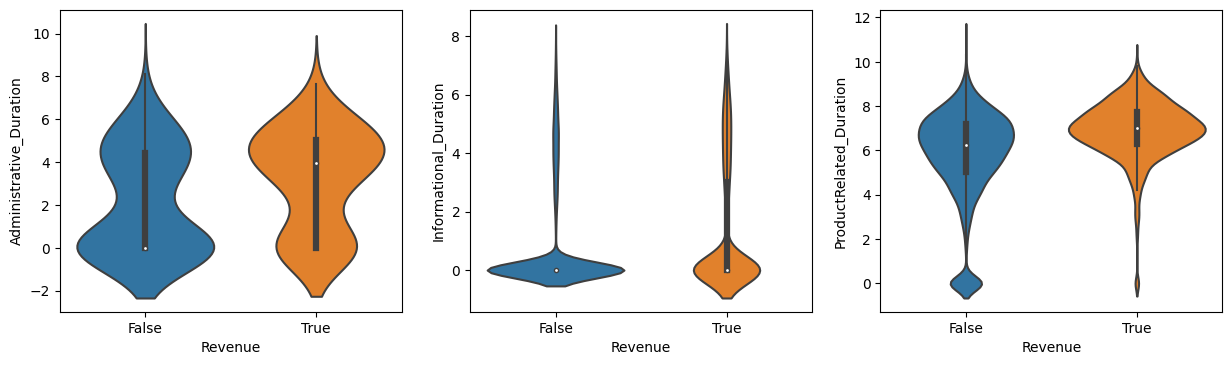

In [13]:
plt.figure(figsize=(15, 4), dpi=100)

plt.subplot(131)
sns.violinplot(bw=0.5, y=df["Administrative_Duration"].apply(lambda x: math.log(x+1)), x=df["Revenue"])
plt.subplot(132)
sns.violinplot(y=df["Informational_Duration"].apply(lambda x: math.log(x+1)), x=df["Revenue"])
plt.subplot(133)
sns.violinplot(y=df["ProductRelated_Duration"].apply(lambda x: math.log(x+1)), x=df["Revenue"])

plt.show()

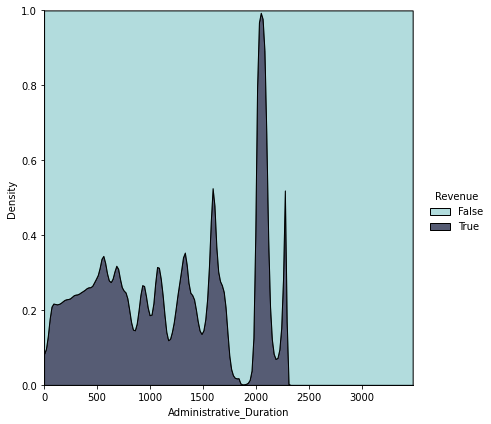

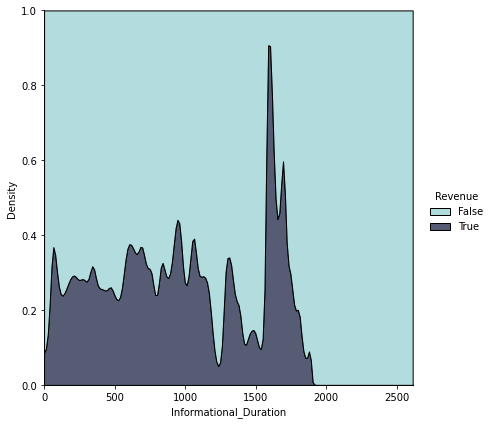

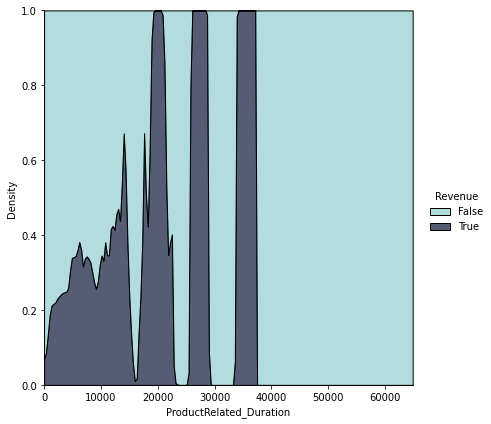

In [14]:
kde_plot(df, "Administrative_Duration", "Revenue")
kde_plot(df, "Informational_Duration", "Revenue")
kde_plot(df, "ProductRelated_Duration", "Revenue")

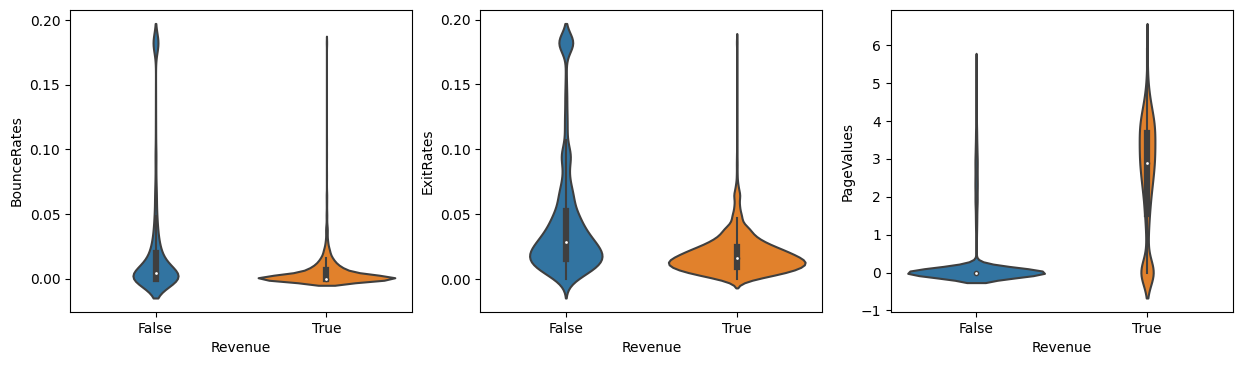

In [15]:
plt.figure(figsize=(15, 4), dpi=100)

plt.subplot(1,3,1)
sns.violinplot(y=df["BounceRates"].apply(lambda x: math.log(x+1)), x=df["Revenue"])
plt.subplot(1,3,2)
sns.violinplot(y=df["ExitRates"].apply(lambda x: math.log(x+1)), x=df["Revenue"])
plt.subplot(1,3,3)
sns.violinplot(y=df["PageValues"].apply(lambda x: math.log(x+1)), x=df["Revenue"])
 
plt.show()

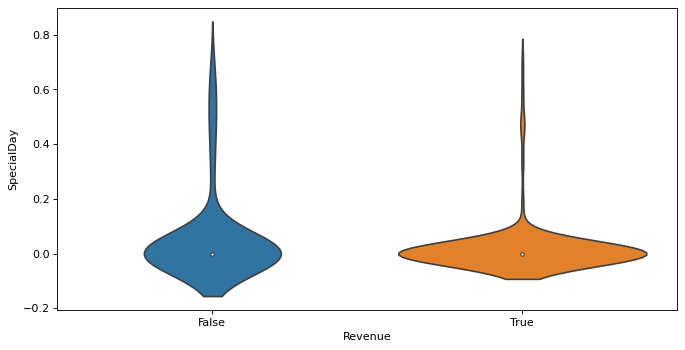

In [16]:
plt.figure(figsize=(10, 5), dpi=80)
sns.violinplot(bw=0.5, y=df["SpecialDay"].apply(lambda x: math.log(x+1)), x=df["Revenue"])
plt.show()

## 1.3Categorical features

In [17]:
def creat_table(title, data):
  df = data
  freq_tb = df[title].groupby(df.Revenue).value_counts()
  freq_tb = freq_tb.unstack(level='Revenue').fillna(0).transpose()
  col_name = list(freq_tb.columns)
  False_num = list(freq_tb.iloc[0,:])
  True_num = list(freq_tb.iloc[1,:])
  T_prp = []
  F_prp = []
  i = 0
  while i < len(col_name):
    F_prp.append(False_num[i]/sum(False_num))
    T_prp.append(True_num[i]/sum(True_num))
    i += 1
  T_prp = [float('{:.2f}'.format(j)) for j in T_prp]
  F_prp = [float('{:.2f}'.format(j)) for j in F_prp]
  prp = [T_prp, F_prp]
  cellTexts = prp
  rowLabels = ['Rev : True', 'Rev : False']
  plt.figure(figsize=(12, 1), dpi=100)
  plt.table(cellText=cellTexts,
  #        colWidths=[0.1]*len(col_name),     #the width of each cell * the number of col names
          colLabels=col_name, rowLabels=rowLabels,
          rowLoc="center", loc="center")
  plt.axis('off')
  plt.title(title, loc="center")
  plt.show()
  plt.table

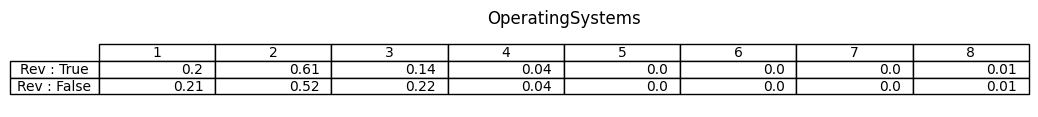

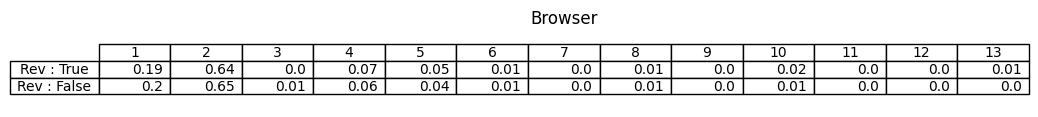

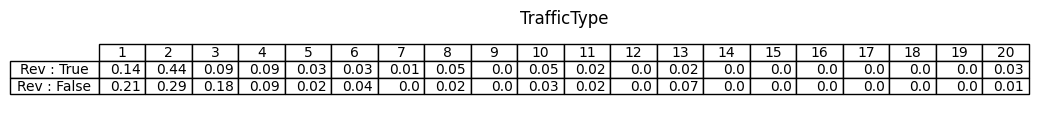

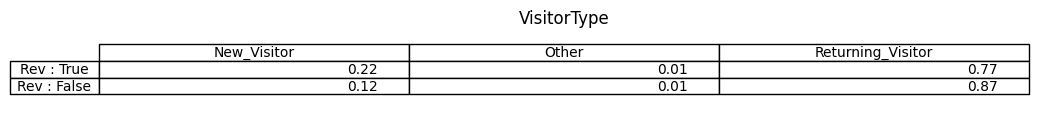

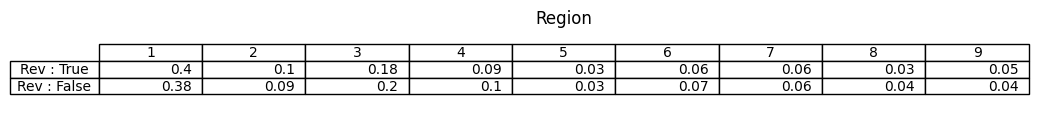

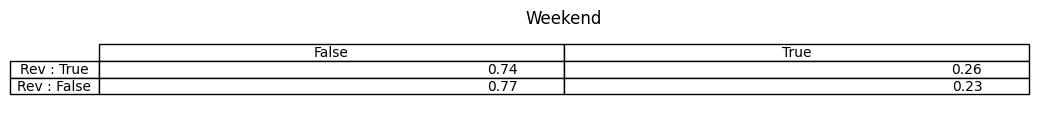

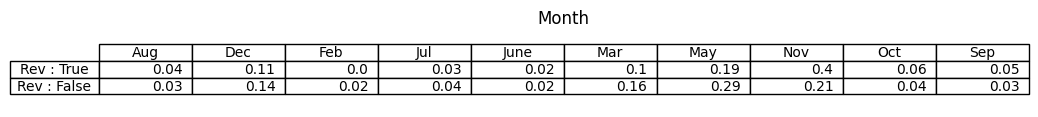

In [18]:
for i in ["OperatingSystems", "Browser", "TrafficType", "VisitorType", "Region", "Weekend", "Month"]:
  creat_table(i, df)

The two groups(Revenue: True & Revenue: False) do have some difference. e.g.  

1.   The ProductedRelated_Durationof 'Revenue: True' seems higher than the other.
2.   The successful transaction rate reaches its top in Nov(0.4) while goes down to its bottom in Feb(nearly zero).

# 2.Data pre-processing

## 2.1.Detect the outliers

In [19]:
train_features = num_features + cat_features
X = df[train_features]
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

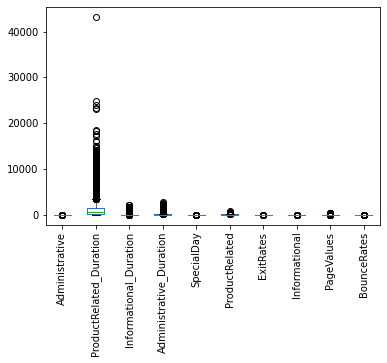

In [20]:
X_train[num_features].plot(kind="box")
plt.xticks(rotation=90)
plt.show()

Using PCA to check if it can be reduced to a low level(2D).

In [21]:
pca = PCA()
pca.fit(X_train[num_features])
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
X_train[num_features]
d

1

The outcome 1D must be a mistake. All the numeric classes should be scaled to a same range first.

In [22]:
trn_X = X_train[num_features]
trn_X = StandardScaler().fit_transform(trn_X)
pca = PCA()
pca.fit(trn_X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

8

8D is still too high. Just dropping those seems most like outliers.

In [23]:
X_train[X_train.ProductRelated_Duration >= 20000]

,Administrative,ProductRelated_Duration,Informational_Duration,Administrative_Duration,SpecialDay,ProductRelated,ExitRates,Informational,PageValues,BounceRates,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
5152,17,43171.23338,2050.433333,2629.253968,0.0,705,0.015431,24,0.763829,0.004851,May,2,2,1,14,Returning_Visitor,True
7662,10,23888.81000,250.000000,1251.200000,0.0,414,0.027062,7,1.033757,0.009900,Sep,2,2,4,13,Returning_Visitor,False
6684,20,23342.08205,299.033333,199.456273,0.0,686,0.022771,7,0.150650,0.009853,Aug,2,2,1,1,Returning_Visitor,False
6165,10,23050.10414,434.300000,2407.423810,0.0,486,0.011249,3,0.000000,0.000324,Jul,2,2,1,3,Returning_Visitor,False
8308,27,24844.15620,126.500000,853.735949,0.0,584,0.009347,2,4.511100,0.002099,Nov,2,4,3,8,Returning_Visitor,False


In [24]:
X_train = X_train.drop([5152, 7662, 6684, 6165, 8308])
y_train = y_train.drop([5152, 7662, 6684, 6165, 8308])

In [25]:
X_train[X_train.ProductRelated_Duration >= 20000]

,Administrative,ProductRelated_Duration,Informational_Duration,Administrative_Duration,SpecialDay,ProductRelated,ExitRates,Informational,PageValues,BounceRates,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend


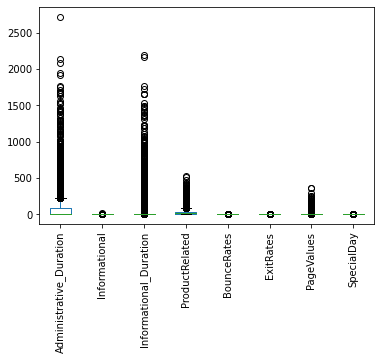

In [26]:
p = ["Administrative_Duration",	"Informational",	"Informational_Duration",	"ProductRelated", "BounceRates",	"ExitRates",	"PageValues",	"SpecialDay"]
X_train[p].plot(kind="box")
plt.xticks(rotation=90)
plt.show()

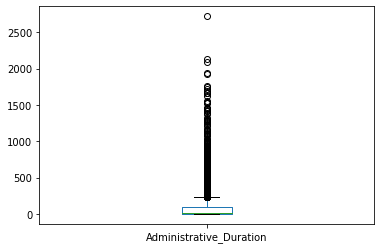

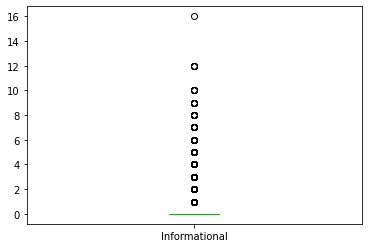

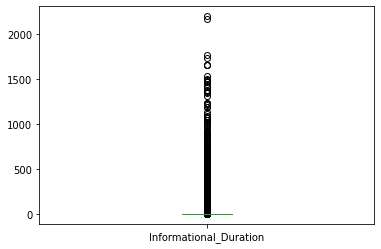

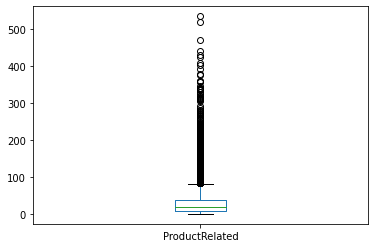

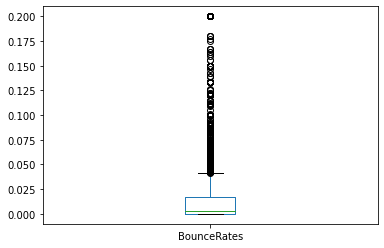

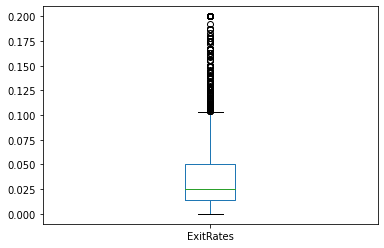

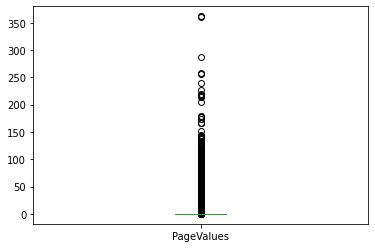

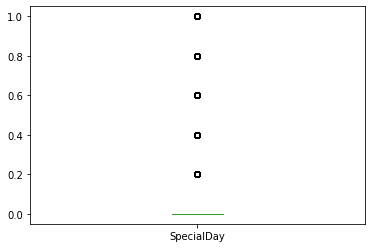

In [27]:
for i in p:
  X_train[i].plot(kind="box")
  plt.show()

## 2.2.Feature selection

In [28]:
# transformer for categorical features
categorical_transformer = Pipeline(
    [
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ]
)

# transformer for numerical features
numeric_transformer = Pipeline(
    [
        ('scaler', StandardScaler())
    ]
)

# combine them in a single ColumnTransformer
preprocessor = ColumnTransformer(
    [
        ('categoricals', categorical_transformer, cat_features),
        ('numericals', numeric_transformer, num_features)
    ],
    remainder = 'drop'
)

In [29]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

X_train_select=preprocessor.fit_transform(X_train)
selector = SelectKBest(f_classif, k='all')
selector.fit(X_train_select, y_train)

#X_new = selector.transform(X_train_select)

SelectKBest(k='all')

In [30]:
sele_scores = list(selector.scores_)
sele_scores.sort()
sele_scores

[0.00023025169148651898,
 0.00038819703132577223,
 0.00046756781893247804,
 0.0023228837141021255,
 0.007307958394004448,
 0.008448566644664375,
 0.014243853026205448,
 0.014951043773474887,
 0.04155287674994158,
 0.058798291219278105,
 0.13500292774622982,
 0.18143907721133012,
 0.18276068765557038,
 0.18276068765557038,
 0.18276068765557038,
 0.18487712201330803,
 0.23990094621611474,
 0.2791037166748896,
 0.2791037166748896,
 0.31588945658591394,
 0.34118030313480147,
 0.41372124369169483,
 0.44194147926508237,
 0.548432483285769,
 0.5584846137876954,
 0.7342242361903984,
 0.9428114358646593,
 0.9920839585596634,
 1.097316537162963,
 1.1280784047767543,
 1.1870056160018427,
 1.3419028199641256,
 1.359608023782508,
 1.5426466795508764,
 1.5722710382263236,
 2.0279271462726154,
 2.2133173204683745,
 2.9900275268748615,
 4.351620838704259,
 4.625530875101032,
 4.768124988853021,
 4.875947375300829,
 4.931248371703758,
 4.93124837170601,
 5.067749542178512,
 5.125129777065679,
 5.446897

In [31]:
sum(i > 10 for i in sele_scores)

25

Selecting the most important 25 features.

In [32]:
selector_25 = SelectKBest(f_classif, k=25)
selector_25.fit(X_train_select, y_train)

SelectKBest(k=25)

# 3.Model implementation & hyperparameter opimisation

## 3.1.Preparation before implementation

Creat a function to evaluate classifiers.

In [33]:
def evaluate(classifier):
  #if classifier == "KN":
    #y_pred_cls = y_pred_KN
  if classifier == "LR":
    y_pred_cls = y_pred_LR
  elif classifier == "SVM":
    y_pred_cls = y_pred_SVM
  elif classifier == "RF":
     y_pred_cls = y_pred_RF
  accuracy = accuracy_score(y_test, y_pred_cls) * 100
  score0 = f1_score(y_test, y_pred_cls, pos_label= 0)
  score1 = f1_score(y_test, y_pred_cls, pos_label= 1)
  AUC = roc_auc_score(y_test, y_pred_cls)
  report_ = classification_report(y_test, y_pred_cls)
  
  print('Accuracy:  %.2f%%' % accuracy)
  print('AUC:         %.4f' % AUC)
  #print('F1 Score of positive:  %.4f' % score0)
  print('F1 Score:    %.4f' % score1)
  print('\nconfusion_matrix: \n', confusion_matrix(y_test, y_pred_cls))
  print(report_)

Generating dataset for Hyperparameter Optimisation

In [34]:
num_attribs = list(X_train[num_features])
cat_attribs = list(X_train[cat_features])

full_pipeline = ColumnTransformer([
("num", numeric_transformer, num_attribs),
("cat", categorical_transformer, cat_attribs),
])
#X_op is a train set used for hyperparameter optimisation
X_op = full_pipeline.fit_transform(X_train)

Creat a dict as a class weight parameter.

In [35]:
total = y_train.value_counts()
print(total)
true_perct, false_perct= total[1]/(sum(total)), total[0]/(sum(total))
trasc_weight = {0:true_perct, 1:false_perct}

False    7293
True     1333
Name: Revenue, dtype: int64


## 3.2.Logistic Regression

Hyperparameter Optimisation

In [36]:
cls_LR = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, 
                            random_state=42, class_weight=trasc_weight)
param_dist_LR = {"C" : [0.01, 0.1, 1, 10, 50, 100, 500, 1000, 5000, 10000,],}
grid_search = GridSearchCV(estimator=cls_LR, n_jobs=10, param_grid=param_dist_LR, 
                           cv = 10, scoring='f1', verbose=5)
grid_search.fit(X_op, y_train)
grid_search.best_estimator_, grid_search.best_score_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


(LogisticRegression(C=0.1,
                    class_weight={0: 0.1545328077904011, 1: 0.8454671922095989},
                    max_iter=1000, random_state=42), 0.6213610127396727)

In [37]:
myClassfier_LR = Pipeline(
    [
     ('preprocessing', preprocessor),
     ('feature_selection', selector_25),
     ('classifier', LogisticRegression(C = 0.1, penalty='l2', solver='lbfgs', 
                                      random_state=42, max_iter=1000, class_weight=trasc_weight))
    ]
)
myClassfier_LR.fit(X_train, y_train)
y_pred_LR = myClassfier_LR.predict(X_test)

In [38]:
evaluate("LR")

Accuracy:  86.21%
AUC:         0.8219
F1 Score:    0.6326

confusion_matrix: 
 [[2750  374]
 [ 136  439]]
              precision    recall  f1-score   support

       False       0.95      0.88      0.92      3124
        True       0.54      0.76      0.63       575

    accuracy                           0.86      3699
   macro avg       0.75      0.82      0.77      3699
weighted avg       0.89      0.86      0.87      3699



## 3.3.RandomForest

In [39]:
cls_RF = RandomForestClassifier(random_state=42, class_weight=trasc_weight)
param_dist_RF = {'n_estimators' : [450, 500, 550, 600,], 
                 'max_depth' : [60, 70],
                 'min_samples_split' : [5,7],
                 'min_samples_leaf' : [3,5],}

grid_search = GridSearchCV(estimator=cls_RF, n_jobs=10, param_grid=param_dist_RF, 
                           cv = 5, scoring='f1', verbose=5)
grid_search.fit(X_op, y_train)
grid_search.best_estimator_, grid_search.best_score_

Fitting 5 folds for each of 32 candidates, totalling 160 fits


(RandomForestClassifier(class_weight={0: 0.1545328077904011,
                                      1: 0.8454671922095989},
                        max_depth=60, min_samples_leaf=3, min_samples_split=5,
                        n_estimators=450, random_state=42), 0.6898387543328427)

In [40]:
myClassfier_RF = Pipeline(
    [
     ('preprocessing', preprocessor),
     ('feature_selection', selector_25),
     ('classifier', RandomForestClassifier(max_depth=60, min_samples_leaf=3, 
                                           min_samples_split=5,
                        n_estimators=550, class_weight=trasc_weight, random_state=42))
      ]
)
myClassfier_RF.fit(X_train, y_train)
y_pred_RF = myClassfier_RF.predict(X_test)

In [41]:
evaluate("RF")

Accuracy:  89.05%
AUC:         0.8110
F1 Score:    0.6639

confusion_matrix: 
 [[2894  230]
 [ 175  400]]
              precision    recall  f1-score   support

       False       0.94      0.93      0.93      3124
        True       0.63      0.70      0.66       575

    accuracy                           0.89      3699
   macro avg       0.79      0.81      0.80      3699
weighted avg       0.90      0.89      0.89      3699



## 3.4.SVM

In [42]:
cls_SVM = SVC(random_state=42, kernel="rbf", class_weight=trasc_weight)
param_dist_SVM = {'C' : [10, 20, 50, 90, 100, 110],
                  'gamma' : [0.05, 0.002, 0.001, 0.0001, 0.00005]}

grid_search = GridSearchCV(estimator=cls_SVM, n_jobs=10, 
                           param_grid=param_dist_SVM, cv = 5, scoring='f1', verbose=5)
grid_search.fit(X_op, y_train)
grid_search.best_estimator_, grid_search.best_score_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


(SVC(C=90, class_weight={0: 0.1545328077904011, 1: 0.8454671922095989},
     gamma=0.002, random_state=42), 0.6566803327934434)

In [43]:
myClassfier_SVM = Pipeline(
    [
     ('preprocessing', preprocessor),
     ('feature_selection', selector_25),
     ("classifier", SVC(kernel="rbf", gamma=0.002, C=90, 
                        class_weight=trasc_weight, random_state=42))
     ]
     )
myClassfier_SVM.fit(X_train, y_train)
y_pred_SVM = myClassfier_SVM.predict(X_test)

In [44]:
evaluate("SVM")

Accuracy:  88.38%
AUC:         0.8340
F1 Score:    0.6708

confusion_matrix: 
 [[2831  293]
 [ 137  438]]
              precision    recall  f1-score   support

       False       0.95      0.91      0.93      3124
        True       0.60      0.76      0.67       575

    accuracy                           0.88      3699
   macro avg       0.78      0.83      0.80      3699
weighted avg       0.90      0.88      0.89      3699



# 4.Using OverSampling method

## 4.1.Generating oversampled train set.

In [45]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

#X_op_os is a train dataset used for hyperparameter optimisation
X_op_os = full_pipeline.fit_transform(X_resampled)

In [46]:
def evaluate_os(classifier):
  #if classifier == "KN":
    #y_pred_cls = y_pred_KN
  if classifier == "LR":
    y_pred_cls_os = y_pred_LR_os
  elif classifier == "SVM":
    y_pred_cls_os = y_pred_SVM_os
  elif classifier == "RF":
     y_pred_cls_os = y_pred_RF_os
  accuracy = accuracy_score(y_test, y_pred_cls_os) * 100
  score = f1_score(y_test, y_pred_cls_os)
  AUC = roc_auc_score(y_test, y_pred_cls_os)
  report_os = classification_report(y_test, y_pred_cls_os)
  print('Accuracy:  %.2f%%' % accuracy)
  print('AUC:         %.4f' % AUC)
  print('F1 Score:  %.4f' % score)
  print('\nconfusion_matrix: \n', confusion_matrix(y_test, y_pred_cls_os))
  print(report_os)

In [47]:
X_train_select_=preprocessor.fit_transform(X_resampled)
selector_ = SelectKBest(f_classif, k='all')
selector_.fit(X_train_select_, y_resampled)

SelectKBest(k='all')

In [48]:
sele_scores_ = list(selector_.scores_)
sele_scores_.sort()
sele_scores_

[0.0,
 0.0,
 0.0009113721799637303,
 0.004857303390654555,
 0.006779749264570388,
 0.014864659638570917,
 0.04167461755556073,
 0.09096579426661042,
 0.16947458694633383,
 0.1842696376827872,
 0.2502445134611103,
 0.34460861622711614,
 0.5002229463213858,
 0.5002229463213858,
 0.7135945785600978,
 0.8405155109107588,
 0.8996982087467665,
 1.0,
 1.0,
 1.0,
 1.077049510601512,
 1.6683444678319779,
 2.4223633986200284,
 2.9839950962373267,
 3.0008230452674898,
 3.473606210303454,
 3.7902518376867786,
 3.863197551212621,
 4.160224556278886,
 5.31914361032539,
 5.84516507661582,
 5.9293498877827595,
 6.004116920543432,
 6.646074274725005,
 6.6612016308210995,
 7.442087212177005,
 8.62568127445271,
 10.152933795154322,
 10.462242121758036,
 10.567745184127375,
 13.515697982308003,
 13.515697982311773,
 16.086033365503933,
 19.858980761211424,
 21.694618873645435,
 22.2473499850314,
 25.949535190709998,
 26.08944543828265,
 26.183911259647452,
 32.06541317867767,
 32.4602061991897,
 42.812382

In [49]:
sum(i > 50 for i in sele_scores_)

22

In [50]:
X_train_select_os=preprocessor.fit_transform(X_resampled)
selector_22_os = SelectKBest(f_classif, k=22)
selector_22_os.fit(X_train_select_os, y_resampled)

SelectKBest(k=22)

##4.2.Logistic Regression

In [51]:
cls_LR = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, 
                            random_state=42,)
param_dist_LR = {"C" : [0.1, 0.3, 0.5, 0.6, 0.7, 1, 1.2, 2, 10, 20],}
grid_search = GridSearchCV(estimator=cls_LR, n_jobs=10, param_grid=param_dist_LR, 
                           cv = 10, scoring='roc_auc', verbose=5)
grid_search.fit(X_op_os, y_resampled)
grid_search.best_estimator_, grid_search.best_score_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


(LogisticRegression(C=0.6, max_iter=1000, random_state=42), 0.9095661016559449)

In [52]:
myClassfier_LR_os = Pipeline(
    [
     ('preprocessing', preprocessor),
     ('feature_selection', selector_22_os),
     ('classifier', LogisticRegression(C = 0.6, penalty='l2', solver='lbfgs',
                                       max_iter=1000,))
    ]
)
myClassfier_LR_os.fit(X_resampled, y_resampled)
y_pred_LR_os = myClassfier_LR_os.predict(X_test)

In [53]:
evaluate_os("LR")

Accuracy:  85.67%
AUC:         0.8201
F1 Score:  0.6246

confusion_matrix: 
 [[2728  396]
 [ 134  441]]
              precision    recall  f1-score   support

       False       0.95      0.87      0.91      3124
        True       0.53      0.77      0.62       575

    accuracy                           0.86      3699
   macro avg       0.74      0.82      0.77      3699
weighted avg       0.89      0.86      0.87      3699



##4.3.Random forest

In [54]:
cls_RF = RandomForestClassifier(random_state=42,)
param_dist_RF = {'n_estimators' : [400, 500, 550,], 
                 'max_depth' : [40, 50, 60, 70],
                 'min_samples_split' : [4, 5, 6],
                 'min_samples_leaf' : [3, 4],}
grid_search = GridSearchCV(estimator=cls_RF, n_jobs=10, param_grid=param_dist_RF, 
                           cv = 5, scoring='roc_auc', verbose=5)
grid_search.fit(X_op_os, y_resampled)
grid_search.best_estimator_, grid_search.best_score_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


(RandomForestClassifier(max_depth=40, min_samples_leaf=3, min_samples_split=4,
                        n_estimators=500, random_state=42), 0.9900214068237749)

In [60]:
myClassfier_RF_os = Pipeline(
    [
     ('preprocessing', preprocessor),
     ('feature_selection', selector_22_os),
     ('classifier', RandomForestClassifier(max_depth=40, min_samples_leaf=3,
                      min_samples_split=4, n_estimators=500, random_state=42))
      ])
myClassfier_RF_os.fit(X_resampled, y_resampled)
y_pred_RF_os = myClassfier_RF_os.predict(X_test)

In [61]:
evaluate_os("RF")

Accuracy:  88.86%
AUC:         0.8241
F1 Score:  0.6709

confusion_matrix: 
 [[2867  257]
 [ 155  420]]
              precision    recall  f1-score   support

       False       0.95      0.92      0.93      3124
        True       0.62      0.73      0.67       575

    accuracy                           0.89      3699
   macro avg       0.78      0.82      0.80      3699
weighted avg       0.90      0.89      0.89      3699



## 4.4.SVM

In [57]:
cls_SVM = SVC(random_state=42, kernel="rbf")
param_dist_SVM = {'C' : [0.01, 0.05, 0.1, 1,],
                  'gamma' : [0.01, 0.009, 0.001,]}
grid_search = GridSearchCV(estimator=cls_SVM, n_jobs=10, 
      param_grid=param_dist_SVM, cv = 5, scoring='roc_auc', verbose=5)
grid_search.fit(X_op_os, y_resampled)
grid_search.best_estimator_, grid_search.best_score_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


(SVC(C=1, gamma=0.01, random_state=42), 0.9177764849249123)

In [58]:
myClassfier_SVM_os = Pipeline(
    [
     ('preprocessing', preprocessor),
     ('feature_selection', selector_22_os),
     ("classifier", SVC(kernel="rbf", gamma=0.01, C=1, 
                        random_state=42))
     ])
myClassfier_SVM_os.fit(X_resampled, y_resampled)
y_pred_SVM_os = myClassfier_SVM_os.predict(X_test)

In [59]:
evaluate_os("SVM")

Accuracy:  88.02%
AUC:         0.8298
F1 Score:  0.6626

confusion_matrix: 
 [[2821  303]
 [ 140  435]]
              precision    recall  f1-score   support

       False       0.95      0.90      0.93      3124
        True       0.59      0.76      0.66       575

    accuracy                           0.88      3699
   macro avg       0.77      0.83      0.79      3699
weighted avg       0.90      0.88      0.89      3699

